<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_004_eda_skewed_data_outliers_removed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Plan for Handling Highly Skewed Data: Exploring Transformation Techniques

When dealing with highly skewed data, transformations can help improve model performance by making the data more normally distributed. Here’s a structured plan for applying and evaluating these methods:

---

#### **1. Understanding the Problem: Why Transform?**
- **Skewed Data Impact:** Highly skewed features can negatively impact the performance of models that assume normally distributed data, such as linear regression, logistic regression, and many tree-based methods.
- **Outliers and Variance:** Skewed distributions can lead to outliers and high variance, which can cause instability in models. Addressing this can make the model more robust and accurate.

---

#### **2. Selecting Features to Transform**
- **Evaluate Skewness:** Use statistical tests (e.g., skewness, kurtosis) or visual methods (e.g., histograms, boxplots) to identify which columns are highly skewed.
- **Focus on Key Features:** Prioritize transforming features that are important for the model or have a significant impact on predictions.

---

#### **3. Transformation Techniques: Methods Overview**

1. **Log Transformation**
   - **What It Does:** Reduces skewness by applying the logarithm of the data. Works well for data with positive skew (long tail on the right).
   - **When to Use:** For features with large positive values and multiplicative relationships. It works best when the data is strictly positive.
   - **Strengths:** Simple, widely used, effective for moderate skewness.
   - **Weaknesses:** Cannot handle zero or negative values, can over-smooth some data.

2. **PowerTransformer (Box-Cox or Yeo-Johnson)**
   - **What It Does:** Applies a power transformation to make data more Gaussian-like. Box-Cox requires positive data, while Yeo-Johnson can handle both positive and negative values.
   - **When to Use:** When you have a mix of positive and negative values or when you need flexibility in handling skewness.
   - **Strengths:** Effective for both moderate and high skewness, can handle negative values (Yeo-Johnson).
   - **Weaknesses:** More complex than log transformation, can be sensitive to extreme outliers.

3. **QuantileTransformer**
   - **What It Does:** Maps the original data to a uniform or normal distribution. The data is ranked, and then values are assigned based on the quantiles.
   - **When to Use:** When you need a strong transformation to normalize distributions. Useful for severe skewness.
   - **Strengths:** Can effectively handle extreme skewness, makes data uniformly or normally distributed.
   - **Weaknesses:** Can lead to loss of original data structure, may introduce noise or reduce model interpretability.

4. **RobustScaler**
   - **What It Does:** Scales data based on the median and interquartile range (IQR), making it less sensitive to outliers.
   - **When to Use:** When dealing with features with significant outliers that you don’t want to remove.
   - **Strengths:** Maintains the structure of the data while minimizing the impact of outliers.
   - **Weaknesses:** Does not specifically target skewness; better for robust scaling rather than normalization.

5. **Winsorization (Capping)**
   - **What It Does:** Limits extreme values by capping them at specified percentiles. The highest and lowest values are replaced with the nearest specified limits.
   - **When to Use:** When you want to reduce the impact of extreme outliers without removing them.
   - **Strengths:** Simple, preserves the majority of the data structure while reducing the influence of outliers.
   - **Weaknesses:** Can distort important variability if overused; doesn’t necessarily normalize skewed data.

6. **Combined Methods (IQR + Winsorization + Robust Scaling)**
   - **What It Does:** Combines multiple methods to achieve a more balanced data transformation. The IQR method removes extreme outliers, followed by Winsorization to cap remaining outliers, and then scaling using RobustScaler.
   - **When to Use:** When single transformations are not sufficient to address both outliers and skewness.
   - **Strengths:** Provides a balanced approach to reducing skewness and handling outliers, maintaining robustness.
   - **Weaknesses:** Requires careful tuning and analysis to avoid over-correcting the data.

---

#### **4. Implementation Strategy: How to Apply These Methods**
- **Step 1:** Start with simple methods like log transformation or Winsorization for moderate skewness.
- **Step 2:** For more complex or severe skewness, experiment with PowerTransformer or QuantileTransformer.
- **Step 3:** Evaluate the impact of transformations on model performance using cross-validation and metrics.
- **Step 4:** Consider combined methods if individual transformations are not effective enough.
- **Step 5:** Apply transformations selectively based on feature importance and the nature of the skewness.

---

#### **5. Evaluation and Comparison**
- **Visualize Distributions:** Use histograms, boxplots, and Q-Q plots before and after transformations to evaluate the effectiveness of each method.
- **Assess Model Impact:** Track changes in model performance (e.g., accuracy, precision, recall) as you apply different transformations.
- **Compare Methods:** Use bar plots or summary tables to compare the number of rows affected, skewness reduction, and overall model performance for each method.

---

#### **6. Documentation: Summarizing the Process**
- **Keep a Log of Transformations:** Document which features were transformed, which method was used, and why.
- **Include Insights:** Record any insights or patterns observed during the process, such as which transformations had the most significant impact on performance.
- **Final Recommendation:** Conclude with the chosen transformation approach for each feature and the justification for its selection.

---

### Final Thoughts:
Transforming skewed data is an iterative process, and not every feature needs to be transformed. The goal is to balance improving model performance while preserving interpretability and meaningful patterns in the data.


## Load & Preprocess Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column,
                             process_marriage_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            df = process_marriage_column(df)
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

# Now, load the data
data = load_and_preprocess_data(url, categorical_columns, target)

if data is not None:
    # Ensure the target column is treated as a categorical variable
    data[target] = data[target].astype('category')

    # Print data overview
    data_overview(data)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    data = data.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {data.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in data.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    check_categorical_order(data, categorical_columns + pay_cols)
else:
    print("Error loading and preprocessing data.")


Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

### Remove Outliers Combined Method

In [5]:
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize

def combined_transformer(df, columns):
    # Copy the dataframe to avoid altering the original data
    df_transformed = df.copy()

    # Step 1: Apply IQR-based outlier removal
    for col in columns:
        Q1 = df_transformed[col].quantile(0.25)
        Q3 = df_transformed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mask outliers
        df_transformed = df_transformed[(df_transformed[col] >= lower_bound) & (df_transformed[col] <= upper_bound)]

    # Step 2: Apply Winsorization (capping)
    for col in columns:
        df_transformed[col] = winsorize(df_transformed[col], limits=[0.05, 0.05])

    # Step 3: Apply Robust Scaling
    scaler = RobustScaler()
    df_transformed[columns] = scaler.fit_transform(df_transformed[columns])

    return df_transformed

df = combined_transformer(data, pay_columns)

### Skewness

To check for skewness in the `pay_columns`, you can use the `skew()` method provided by Pandas, which calculates the skewness for each numerical column. The method returns a value that indicates the skewness of the distribution:

- **Skewness ≈ 0**: Data is fairly symmetrical.
- **Skewness > 0**: Positive skew (right-tailed).
- **Skewness < 0**: Negative skew (left-tailed).

The skewness values for the `pay_amt` columns are very high, indicating that the distributions are heavily skewed to the right (positive skew). Here’s a breakdown of what these results imply:

### Interpretation of Skewness Values:
1. **Skewness > 0**: Indicates a right-skewed distribution. The majority of the data points are concentrated towards the lower end, with a long tail extending to the right.



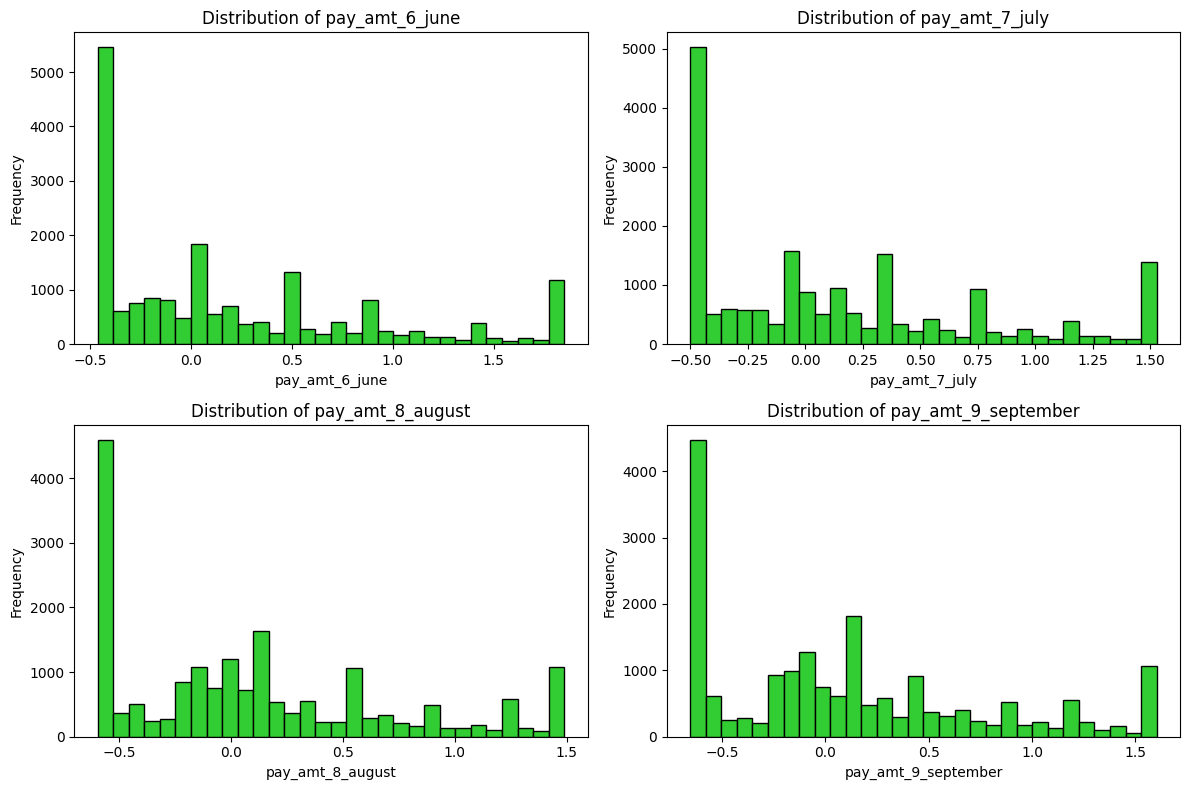

Baseline Skewness:
pay_amt_6_june         1.005263
pay_amt_7_july         0.844826
pay_amt_8_august       0.705723
pay_amt_9_september    0.713611
dtype: float64


In [6]:
# Define the columns to plot
pc = ['pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']

# Initialize the skewness dictionary
skewness_dict = {}

# Save the baseline skewness
baseline_skewness = df[pc].skew()
skewness_dict['baseline'] = {col: skewness for col, skewness in baseline_skewness.items()}

# plot the distribution
color = 'limegreen'
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each column in the grid
for i, col in enumerate(pc):
    # Plot the histogram
    axes[i].hist(df[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

print("Baseline Skewness:")
print(baseline_skewness)

### Log Transformation

- **Log Transformation Limitations**: Cannot handle zero or negative values. Log transformations are effective for compressing a wide range of values but can struggle with data that has a large number of zeros or very small values.

### Why Does This Happen?

1. **Zero or Near-Zero Values**: If the original data contains many zeros or values very close to zero, the log transformation (`np.log1p`) will convert them into small positive values just above zero. These values then get "stacked" into a single bar on the left side of the distribution, creating the pattern you observed.

2. **Sparse Payments or Non-Payments**: In the context of the `pay_amt` columns it’s possible that many customers made little to no payment in those months. These near-zero payment amounts result in a spike in the log-transformed data.

### How to Interpret This?

- **Structural Zeros or Small Values**: This could indicate a significant portion of your dataset has small payment amounts or no payments at all in certain months. It’s common for financial data to be skewed with a mix of low and high values.




In [7]:
# Calculate the count and ratio of zeros for each column
zero_analysis = df[pay_columns].apply(lambda col: (col == 0).sum()).to_frame(name='zero_count')
zero_analysis['zero_ratio'] = zero_analysis['zero_count'] / len(df)

print("Zero Count and Ratio in Pay Columns:")
print(zero_analysis)

Zero Count and Ratio in Pay Columns:
                     zero_count  zero_ratio
pay_amt_4_april            1078    0.056254
pay_amt_5_may              1125    0.058707
pay_amt_6_june             1177    0.061420
pay_amt_7_july                3    0.000157
pay_amt_8_august            167    0.008715
pay_amt_9_september           5    0.000261


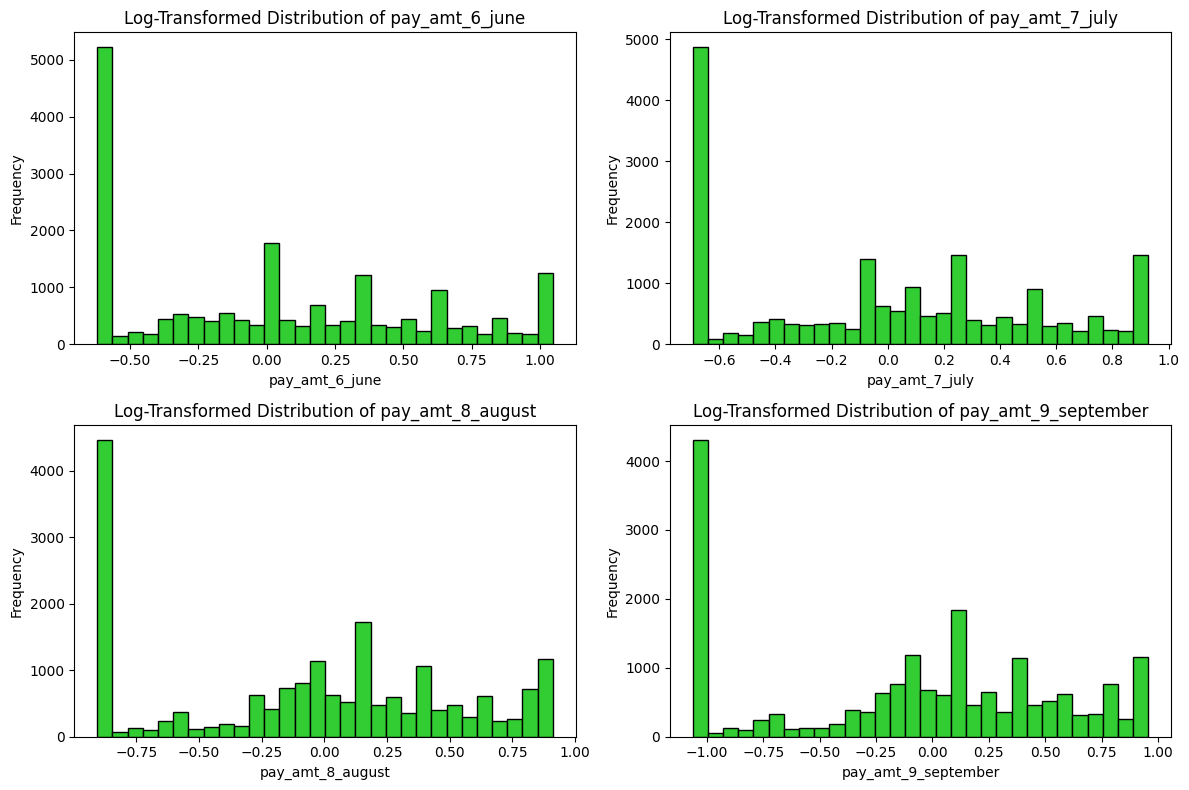


Skewness Dictionary:

Baseline Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Log_transformed Skewness:
pay_amt_6_june: 0.3065
pay_amt_7_july: 0.1395
pay_amt_8_august: -0.1175
pay_amt_9_september: -0.2074


In [8]:
# Apply log transformation (handle any zeros or negative values by adding a small constant)
df_log_transformed = df.copy()
df_log_transformed[pc] = np.log1p(df[pc])  # log1p is log(1 + x), which handles small values and zeros

# Plot the log-transformed data in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pc):
    axes[i].hist(df_log_transformed[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Log-Transformed Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check the skewness after log transformation
log_skewness = df_log_transformed[pc].skew()
skewness_dict['log_transformed'] = log_skewness.to_dict()

# print("Skewness After Log Transformation:")
# print(log_skewness)

print("\nSkewness Dictionary:")
for method, skewness_values in skewness_dict.items():
    print(f"\n{method.capitalize()} Skewness:")
    for col, skew in skewness_values.items():
        print(f"{col}: {skew:.4f}")


### Power Transformer

The Power Transformer in scikit-learn is a feature transformation technique that applies a power-based transformation to make the data more Gaussian-like. It is particularly useful for dealing with skewed features, which can negatively impact the performance of many machine learning models. The transformation helps stabilize variance, minimize skewness, and improve the normality of the data, which can lead to better model performance.

There are two types of power transformations available in scikit-learn’s `PowerTransformer`:

1. **Yeo-Johnson Transformation**: Works for both positive and negative data values. It is more flexible because it can handle a wider range of distributions.

2. **Box-Cox Transformation**: Works only for strictly positive data values. It is often used in cases where the data is already positive and does not need additional handling.

**Strengths**:
- Handles both positive and negative data values (Yeo-Johnson).
- Reduces skewness and helps normalize distributions.
- Can improve the performance of models that are sensitive to non-Gaussian distributions.

**Weaknesses**:
- Sensitive to outliers; extreme values can distort the transformation.
- May not be beneficial if the features are already normally distributed.

**When to Use**:
- When your features are highly skewed.
- When you need to improve the performance of algorithms that benefit from normally distributed data (e.g., linear regression, logistic regression).
- When you want to apply a flexible transformation that can handle both positive and negative values.



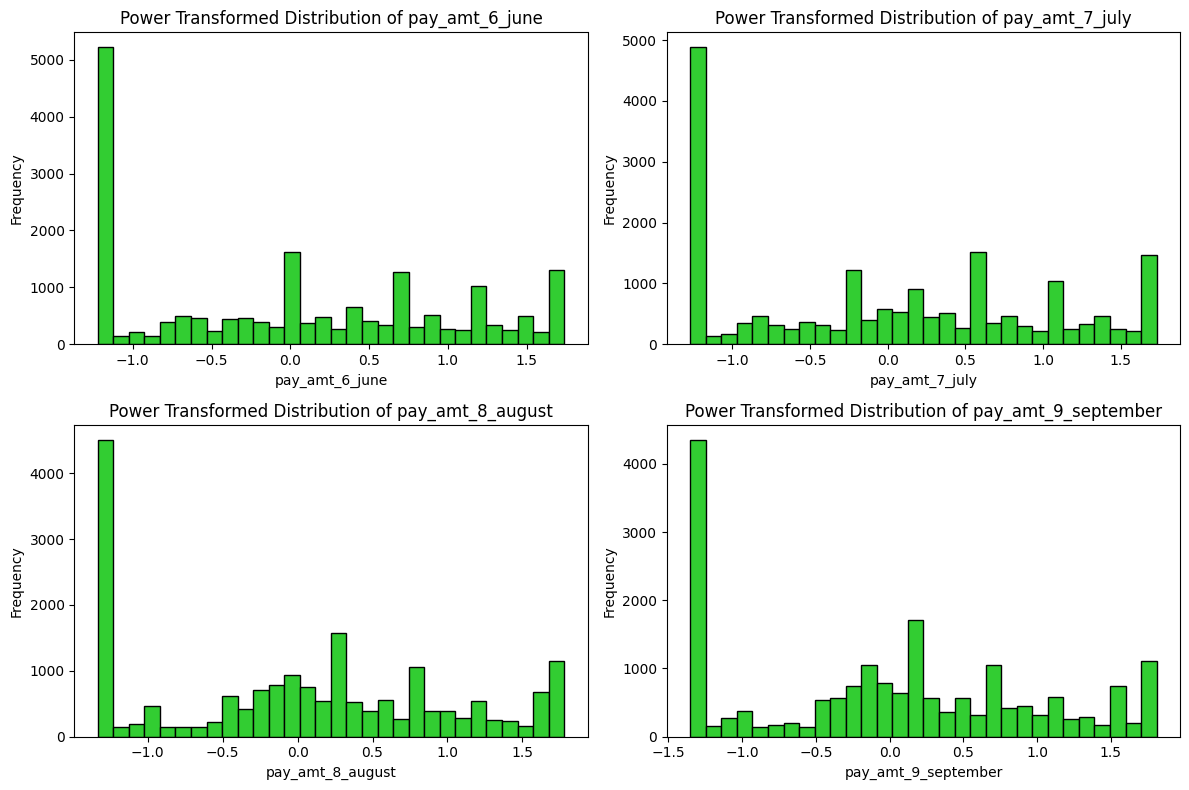


Skewness Dictionary:

Baseline Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Log_transformed Skewness:
pay_amt_6_june: 0.3065
pay_amt_7_july: 0.1395
pay_amt_8_august: -0.1175
pay_amt_9_september: -0.2074

Powertransformer Skewness:
pay_amt_6_june: 0.1845
pay_amt_7_july: 0.1447
pay_amt_8_august: 0.1030
pay_amt_9_september: 0.0985


In [9]:
from sklearn.preprocessing import PowerTransformer

# Create a copy of the selected columns for transformation
df_transformed = df[pc].copy()

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # Yeo-Johnson works for both positive and negative data
df_transformed[pc] = pt.fit_transform(df_transformed[pc])

# Calculate the skewness after the transformation
skewness_power_transform = df_transformed.skew()

# Save the skewness results to the dictionary
skewness_dict['PowerTransformer'] = skewness_power_transform.to_dict()

# Plot the transformed distributions in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pc):
    axes[i].hist(df_transformed[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Power Transformed Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Display the skewness results
# print("Skewness After PowerTransformer:")
# print(skewness_power_transform)

print("\nSkewness Dictionary:")
for method, skewness_values in skewness_dict.items():
    print(f"\n{method.capitalize()} Skewness:")
    for col, skew in skewness_values.items():
        print(f"{col}: {skew:.4f}")

###QuantileTransformer - Normal Distribution

The `QuantileTransformer` in scikit-learn is a powerful tool for transforming features so that they follow a uniform or normal distribution. It is especially useful when your data contains outliers or is highly skewed because it transforms the data to have a specified distribution while still retaining the rank and relative relationships between the original values.

### How Does `QuantileTransformer` Work?

The `QuantileTransformer` works by mapping the original data to a new distribution using quantiles. Here's the step-by-step process:

1. **Rank Ordering**: The transformer first rank-orders the original data. For each value in the dataset, it finds its corresponding quantile.

2. **Mapping to a Desired Distribution**: The transformer then maps these quantiles to a desired output distribution, either uniform or normal (Gaussian). By default, the distribution is uniform, but you can choose a normal distribution by setting `output_distribution='normal'`.

3. **Smoothing**: To avoid issues with duplicate values (which would all map to the same quantile), the transformer applies a small amount of noise (jitter) to break ties.

### Why Use `QuantileTransformer`?

1. **Handling Skewed Data**: If your features are highly skewed, the `QuantileTransformer` can help transform them into a more uniformly or normally distributed shape, which is useful for many machine learning algorithms.

2. **Reducing the Impact of Outliers**: Since the transformation is based on ranks, it is less sensitive to outliers compared to other scaling techniques like `StandardScaler` or `MinMaxScaler`.

3. **Improving Model Performance**: Certain models, especially linear models and algorithms that assume normally distributed data (like Gaussian Naive Bayes), may perform better after applying a `QuantileTransformer` because it makes the data more Gaussian-like.

### When to Use `QuantileTransformer`?

1. **Dealing with Highly Skewed Data**: If your data is heavily skewed and you want to normalize it to either a uniform or normal distribution.

2. **Reducing the Influence of Outliers**: When outliers heavily influence your dataset, `QuantileTransformer` can be a good option as it uses the rank (relative position) of the data rather than its exact value.

3. **Preparing Data for Algorithms That Assume Normality**: If you are using models like Gaussian Naive Bayes or linear models that assume normally distributed data, transforming your data with `QuantileTransformer` can help improve performance.

### Drawbacks of `QuantileTransformer`

- **Loss of Interpretability**: Since the transformation is non-linear, it may make the data less interpretable. The transformed values do not have the same relationship to the original scale.


### Quantile Transformation Normal Distribution Analysis

The results from the QuantileTransformer with a normal distribution show that the skewness for all four columns is negative. Here’s a detailed analysis of what this indicates:

### 1. **Understanding Negative Skewness**:
   - A negative skew (or left-skewed distribution) means that the tail on the left side of the distribution is longer or fatter than the right side. In other words, the bulk of the data points are concentrated on the right side of the distribution, with some smaller, outlier values pulling the distribution leftward.
   - The more negative the skewness value, the more prominent this leftward tail becomes.

### 2. **Interpreting the Results**:
   - In the context of the QuantileTransformer with a normal distribution, the transformation attempts to force the data into a Gaussian (bell-shaped) curve. However, due to the inherent characteristics of the original data (which may have had extreme skewness and high outliers), the transformation ends up pushing some values into a more compressed range.
   - The negative skewness values you see indicate that more of the data points have been adjusted to fit closer to the lower end (left side) of the distribution.

### 3. **Why Are There More Negative Values?**:
   - The presence of more negative values after transformation is a common occurrence when using a QuantileTransformer with a normal distribution. This happens because the transformer maps data uniformly to match the shape of a normal distribution. If the original data had many low or high values, those values are redistributed across the entire range, often resulting in a stretched left tail (negative skewness).
   - Essentially, the transformation introduces negative values because it is trying to map the original data to fit a bell curve centered around zero, where the left tail extends into negative territory.

### 4. **Is Negative Skewness a Problem?**:
   - Negative skewness is not necessarily a problem, but it depends on your model and analysis goals. For models that assume normally distributed data (like linear regression or logistic regression), this transformed distribution could be beneficial because it approximates a Gaussian distribution, albeit with a slight skew.
   - However, for models like decision trees or gradient boosting, which are less sensitive to distribution shape, this transformation may not add much value.

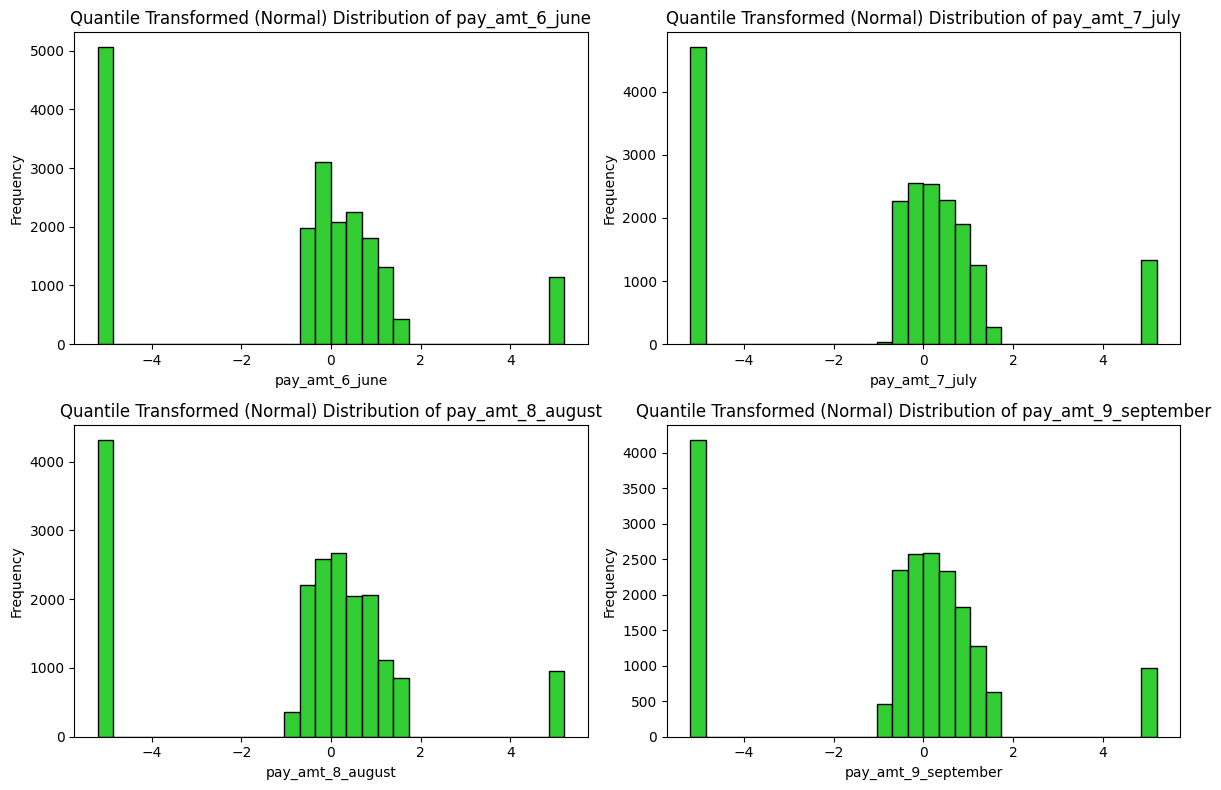


Skewness Dictionary:

Baseline Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Log_transformed Skewness:
pay_amt_6_june: 0.3065
pay_amt_7_july: 0.1395
pay_amt_8_august: -0.1175
pay_amt_9_september: -0.2074

Powertransformer Skewness:
pay_amt_6_june: 0.1845
pay_amt_7_july: 0.1447
pay_amt_8_august: 0.1030
pay_amt_9_september: 0.0985

Quantiletransformer_normal Skewness:
pay_amt_6_june: -0.2763
pay_amt_7_july: -0.2510
pay_amt_8_august: -0.4343
pay_amt_9_september: -0.4440


In [10]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

# Create a copy of the selected columns for transformation
pc = ['pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
df_transformed_normal = df[pc].copy()

# Initialize the QuantileTransformer for normal distribution
qt_normal = QuantileTransformer(output_distribution='normal')

# Apply the transformation
df_transformed_normal[pc] = qt_normal.fit_transform(df_transformed_normal[pc])

# Calculate the skewness after the transformation
skewness_quantile_transform_normal = df_transformed_normal.skew()

# Save the skewness results to the dictionary
skewness_dict['QuantileTransformer_Normal'] = skewness_quantile_transform_normal.to_dict()

# Plot the transformed distributions in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pc):
    axes[i].hist(df_transformed_normal[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Quantile Transformed (Normal) Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Display the skewness results
# print("Skewness After QuantileTransformer (Normal Distribution):")
# print(skewness_quantile_transform_normal)

print("\nSkewness Dictionary:")
for method, skewness_values in skewness_dict.items():
    print(f"\n{method.capitalize()} Skewness:")
    for col, skew in skewness_values.items():
        print(f"{col}: {skew:.4f}")


### Quantile Transformer - Uniforn Distribution

Uniformly distributed data can be desirable in certain situations, particularly in machine learning tasks that involve clustering, certain types of anomaly detection, or when preparing data for algorithms that do not make assumptions about the distribution of the input features. Here’s when and why a uniform distribution might be preferred:

### 1. **Clustering Algorithms**
Some clustering algorithms, like K-means, do not assume a particular distribution of the data. If your data is highly skewed, it can lead to biased cluster assignments or difficulties in finding appropriate centroids. By transforming the data into a uniform distribution, you spread the data more evenly across the feature space, helping clustering algorithms perform better.

### 2. **Reducing Bias in Decision Trees**
In decision tree-based algorithms (e.g., Random Forest, Gradient Boosting), if one feature is heavily skewed, it may dominate splits, even if it’s not particularly informative. By making the feature more uniformly distributed, you can ensure that splits are made more evenly across different ranges, allowing the model to explore a more diverse set of splits.

### 3. **Certain Anomaly Detection Methods**
In some anomaly detection methods, uniformly distributed data can be useful because it creates an even baseline across which deviations (outliers) can be more easily detected. This is particularly the case in methods that rely on statistical thresholds for determining anomalies.

### 4. **Data Visualization and Fair Sampling**
When visualizing data or creating balanced samples for training or validation, having features that are uniformly distributed can make the analysis more meaningful. For example, visualizing a feature that’s uniformly distributed can highlight potential trends or relationships that might be obscured if the data is heavily skewed.

### 5. **Avoiding Overfitting in Models**
For certain models, especially those prone to overfitting (like deep neural networks), a highly skewed feature can lead the model to memorize the more frequent values, leading to poor generalization. Uniformly distributed data reduces this risk by distributing the weight more evenly across different ranges of the feature.

### 6. **Simulation and Synthetic Data Generation**
When simulating scenarios or generating synthetic data for testing, uniformly distributed data is often used as a starting point because it ensures all ranges of a feature are covered evenly. This is particularly important when testing algorithms that need to work well across all possible input scenarios.

### 7. **Feature Engineering for Non-linear Models**
If your data is highly skewed, some non-linear models may struggle to capture patterns effectively. By transforming features into a uniform distribution, you remove bias introduced by certain ranges of the feature, allowing the model to focus on relationships rather than trying to compensate for the skew.

### Key Takeaway
Uniformly distributed data is desirable in scenarios where you want to reduce bias, spread out the influence of different ranges of a feature evenly, or prepare the data for models that do not assume a specific underlying distribution. Although normally distributed data is more commonly discussed, uniformly distributed data plays a critical role in ensuring fair sampling, better model performance, and effective clustering in various applications.

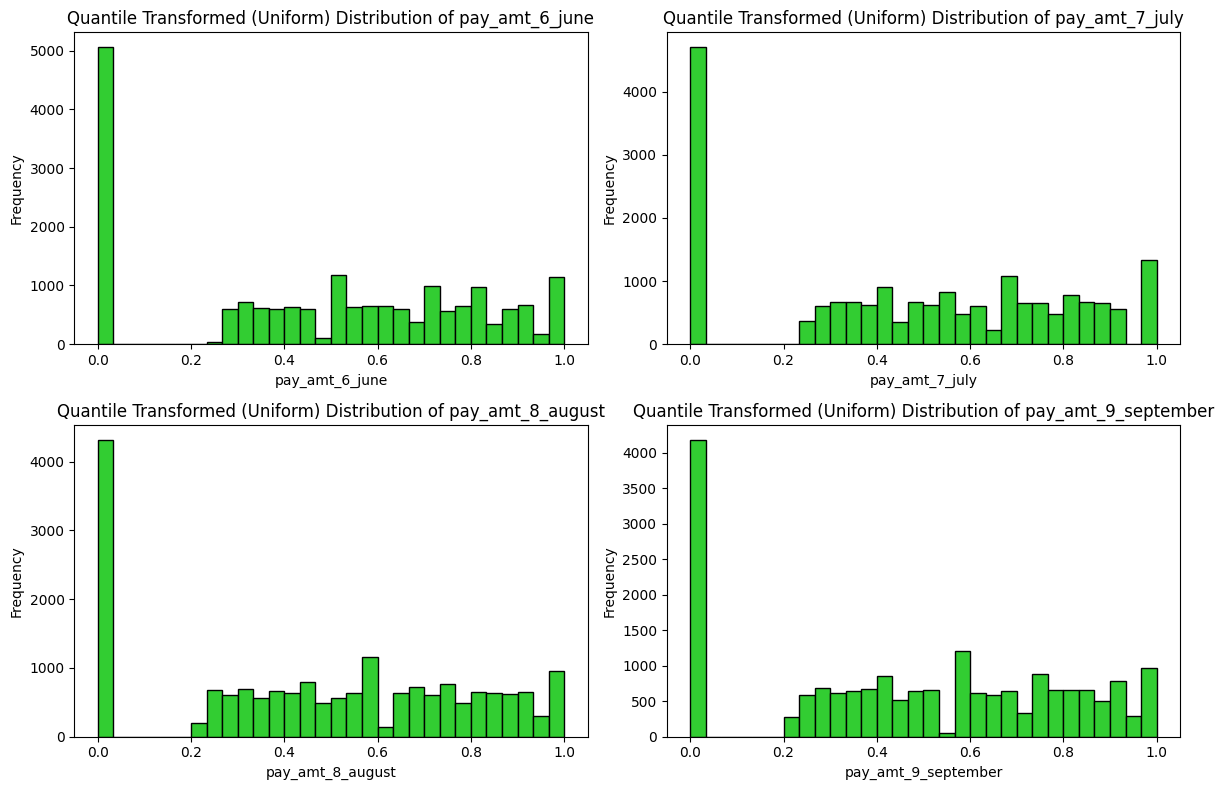


Skewness Dictionary:

Baseline Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Log_transformed Skewness:
pay_amt_6_june: 0.3065
pay_amt_7_july: 0.1395
pay_amt_8_august: -0.1175
pay_amt_9_september: -0.2074

Powertransformer Skewness:
pay_amt_6_june: 0.1845
pay_amt_7_july: 0.1447
pay_amt_8_august: 0.1030
pay_amt_9_september: 0.0985

Quantiletransformer_normal Skewness:
pay_amt_6_june: -0.2763
pay_amt_7_july: -0.2510
pay_amt_8_august: -0.4343
pay_amt_9_september: -0.4440

Quantiletransformer_uniform Skewness:
pay_amt_6_june: -0.1623
pay_amt_7_july: -0.1523
pay_amt_8_august: -0.1562
pay_amt_9_september: -0.1510


In [11]:
# Create a copy of the selected columns for transformation
df_transformed_uniform = df[pc].copy()

# Initialize the QuantileTransformer for uniform distribution
qt_uniform = QuantileTransformer(output_distribution='uniform')

# Apply the transformation
df_transformed_uniform[pc] = qt_uniform.fit_transform(df_transformed_uniform[pc])

# Calculate the skewness after the transformation
skewness_quantile_transform_uniform = df_transformed_uniform.skew()

# Save the skewness results to the dictionary
skewness_dict['QuantileTransformer_Uniform'] = skewness_quantile_transform_uniform.to_dict()

# Plot the transformed distributions in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pc):
    axes[i].hist(df_transformed_uniform[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Quantile Transformed (Uniform) Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Display the skewness results
# print("Skewness After QuantileTransformer (Uniform Distribution):")
# print(skewness_quantile_transform_uniform)

print("\nSkewness Dictionary:")
for method, skewness_values in skewness_dict.items():
    print(f"\n{method.capitalize()} Skewness:")
    for col, skew in skewness_values.items():
        print(f"{col}: {skew:.4f}")

### Robust Scaler

The `RobustScaler` is a feature-scaling technique in scikit-learn that is designed to be more resilient to outliers compared to other scalers like the `StandardScaler` or `MinMaxScaler`. It scales features using statistics that are robust to outliers by focusing on the median and the interquartile range (IQR) instead of the mean and standard deviation.

### How RobustScaler Works:

1. **Median-Centric Scaling**:
   The `RobustScaler` subtracts the median from each feature (instead of the mean), centering the feature values around zero.

2. **Interquartile Range (IQR) Scaling**:
   After centering, it scales the feature values by dividing them by the interquartile range (IQR), which is the range between the 25th and 75th percentiles (Q1 and Q3). The formula used is:

   \[
   X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)}
   \]

   The IQR is more robust to outliers because it only considers the middle 50% of the data, ignoring the extremes.

3. **Why It’s Robust**:
   Unlike the `StandardScaler`, which uses the mean and standard deviation (which are sensitive to outliers), the `RobustScaler` is less affected by extreme values, making it a better choice when your dataset contains outliers.

### When to Use RobustScaler:
- **Outliers Present**: If your data contains outliers that you don’t want to remove but want to reduce their impact during scaling, the `RobustScaler` is a good choice.
- **Skewed Data**: For skewed distributions where the mean is not a good representation of central tendency, the median is more representative.


### Summary:
- **Advantages**:
  - More resilient to outliers compared to other scaling methods.
  - Suitable for datasets with skewed distributions.

- **Limitations**:
  - While it mitigates the impact of outliers, the outliers themselves are still present and may affect the final analysis if not handled separately.

The `RobustScaler` is an essential tool when preprocessing data that contains significant outliers, ensuring that the model training is not unduly affected by those extreme values.

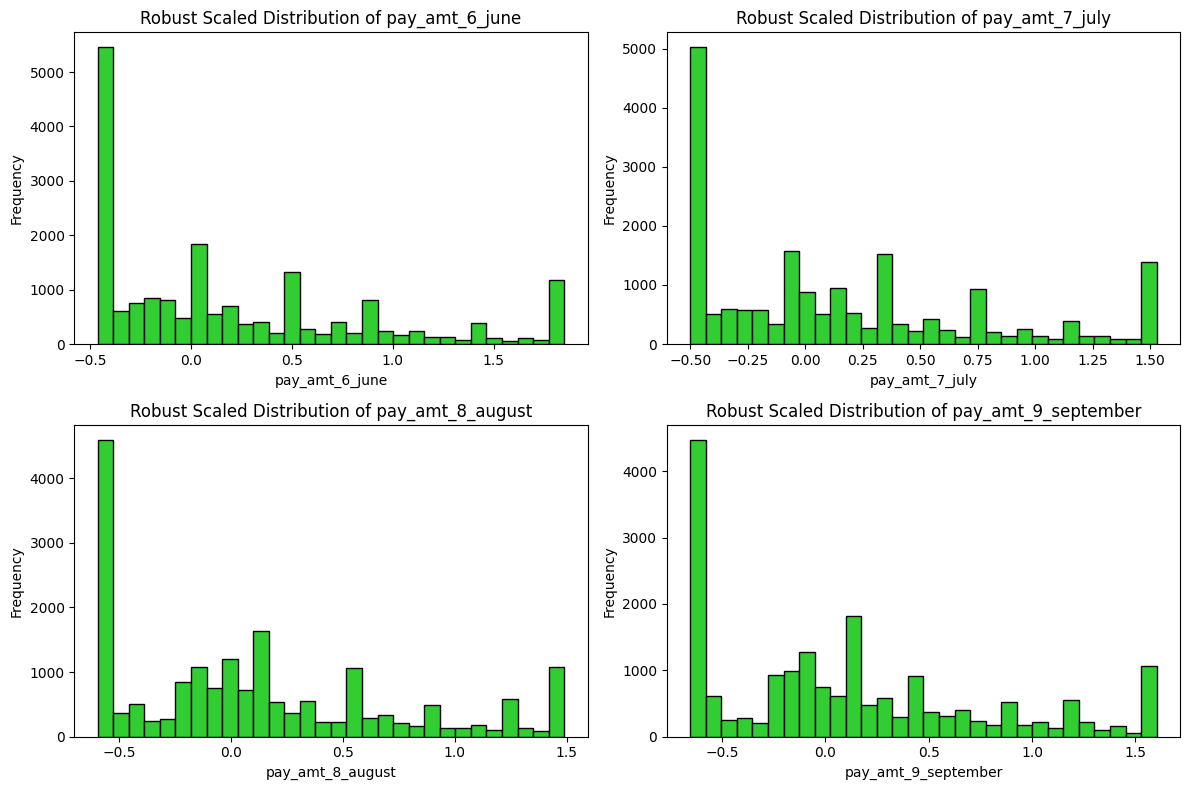


Skewness Dictionary:

Baseline Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Log_transformed Skewness:
pay_amt_6_june: 0.3065
pay_amt_7_july: 0.1395
pay_amt_8_august: -0.1175
pay_amt_9_september: -0.2074

Powertransformer Skewness:
pay_amt_6_june: 0.1845
pay_amt_7_july: 0.1447
pay_amt_8_august: 0.1030
pay_amt_9_september: 0.0985

Quantiletransformer_normal Skewness:
pay_amt_6_june: -0.2763
pay_amt_7_july: -0.2510
pay_amt_8_august: -0.4343
pay_amt_9_september: -0.4440

Quantiletransformer_uniform Skewness:
pay_amt_6_june: -0.1623
pay_amt_7_july: -0.1523
pay_amt_8_august: -0.1562
pay_amt_9_september: -0.1510

Robust_scaler Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136


In [12]:
from sklearn.preprocessing import RobustScaler

# Apply the RobustScaler to the selected columns
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[pc] = scaler.fit_transform(df[pc])

# Calculate skewness after scaling
skewness_robust = {col: df_scaled[col].skew() for col in pc}

# Add to our skewness dictionary
skewness_dict['robust_scaler'] = skewness_robust

# Plot the transformed distributions in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pc):
    axes[i].hist(df_scaled[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Robust Scaled Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Display the skewness values
# print("Robust Scaler Skewness:")
# for col, skew in skewness_robust.items():
#     print(f"{col}: {skew:.4f}")

print("\nSkewness Dictionary:")
for method, skewness_values in skewness_dict.items():
    print(f"\n{method.capitalize()} Skewness:")
    for col, skew in skewness_values.items():
        print(f"{col}: {skew:.4f}")


### Winsorization (Capping)

**Winsorization**, also known as capping, is a data transformation technique that limits extreme values in your dataset to reduce the impact of outliers. Rather than completely removing outliers, Winsorization "caps" the values by setting extreme data points to a defined percentile, typically at both the lower and upper ends of the data distribution. For example, values below the 5th percentile might be replaced by the value at the 5th percentile, and values above the 95th percentile might be replaced by the 95th percentile value.

**Strengths**:
- Reduces the influence of outliers while retaining more data points compared to outright removal.
- Helps stabilize the variance and improve model performance, especially for linear models.

**Weaknesses**:
- Can mask true outliers that might be important or carry significant information.
- The choice of percentiles (e.g., 5th and 95th) is somewhat arbitrary and might require domain knowledge.

**When to Use**:
- When you have extreme outliers that disproportionately affect your model’s performance.
- When you prefer to keep most of the data points intact, rather than removing rows with outliers.
- When working with skewed data that still contains important variability but needs some reduction in extreme values.

**Common Use Cases**:
- Financial data, where extreme outliers can distort analyses (e.g., income data, stock prices).
- Sensor data, where occasional spikes or dips might be due to noise but should not be fully removed.

This technique is often used in conjunction with other preprocessing methods to enhance data quality and improve model robustness.

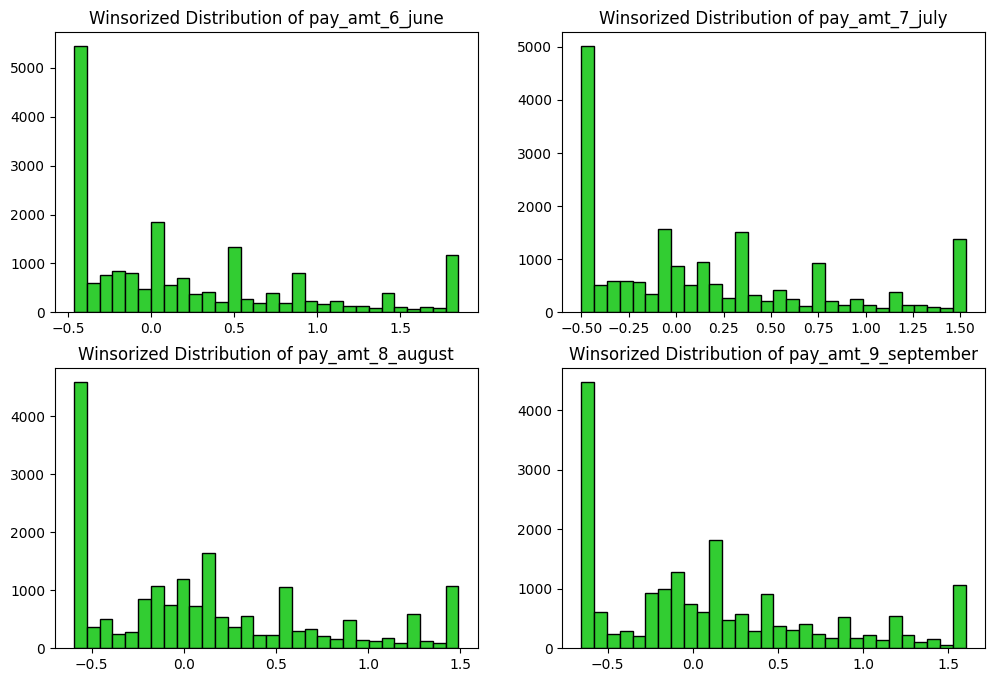

In [13]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (Capping) to the selected columns
df_winsorized = df.copy()

# Winsorize each column (capping the extreme values at 5th and 95th percentiles)
for col in pc:
    df_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])  # Capping at 5th and 95th percentiles

# Calculate skewness after Winsorization
skewness_winsorized = {col: df_winsorized[col].skew() for col in pc}

# Add to our skewness dictionary
skewness_dict['winsorization'] = skewness_winsorized

# Plot the Winsorized distributions in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pc):
    axes[i].hist(df_winsorized[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Winsorized Distribution of {col}')
    axes

In [14]:
print("\nSkewness Dictionary:")
for method, skewness_values in skewness_dict.items():
    print(f"\n{method.capitalize()} Skewness:")
    for col, skew in skewness_values.items():
        print(f"{col}: {skew:.4f}")


Skewness Dictionary:

Baseline Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Log_transformed Skewness:
pay_amt_6_june: 0.3065
pay_amt_7_july: 0.1395
pay_amt_8_august: -0.1175
pay_amt_9_september: -0.2074

Powertransformer Skewness:
pay_amt_6_june: 0.1845
pay_amt_7_july: 0.1447
pay_amt_8_august: 0.1030
pay_amt_9_september: 0.0985

Quantiletransformer_normal Skewness:
pay_amt_6_june: -0.2763
pay_amt_7_july: -0.2510
pay_amt_8_august: -0.4343
pay_amt_9_september: -0.4440

Quantiletransformer_uniform Skewness:
pay_amt_6_june: -0.1623
pay_amt_7_july: -0.1523
pay_amt_8_august: -0.1562
pay_amt_9_september: -0.1510

Robust_scaler Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Winsorization Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136


###Combined Methods (IQR + Winsorization + Robust Scaling)

The **Combined Methods** approach integrates three robust techniques to handle outliers and skewness in data: **Interquartile Range (IQR)**, **Winsorization (Capping)**, and **Robust Scaling**. This combined approach seeks to balance the strengths of each method while minimizing their individual weaknesses. The process is as follows:

1. **Interquartile Range (IQR) Method**: First, the IQR method is applied to identify and remove extreme outliers that fall outside 1.5 times the IQR from the 25th and 75th percentiles. This step efficiently removes significant outliers while retaining the bulk of the data distribution.

2. **Winsorization (Capping)**: After extreme outliers are removed, Winsorization is applied to further cap the remaining extreme values by replacing them with a fixed percentile, such as the 5th and 95th percentiles. This smooths out smaller outliers without eliminating important data points.

3. **Robust Scaling**: Finally, the data is scaled using Robust Scaling, which centers the data based on the median and scales according to the interquartile range. Unlike standard scaling, which can be influenced by outliers, Robust Scaling focuses on the middle 50% of the data, making it highly resistant to the effects of outliers and better suited for non-normally distributed data.

**Strengths**:
- Effectively removes extreme outliers while preserving the shape of the core data distribution.
- Reduces the influence of remaining outliers on model training by capping extreme values.
- Ensures that data is appropriately scaled for use in algorithms sensitive to skewness or varying scales.

**Weaknesses**:
- This method is more complex and involves multiple transformation steps, making it harder to interpret.
- It may still remove data points that could be important for specific use cases.

**When to Use**:
- When dealing with datasets that contain significant outliers and varying data scales.
- When simpler methods (like applying only IQR or Winsorization) result in excessive data loss or do not adequately address the skewness.
- In situations where you need to robustly prepare data for machine learning models, especially those sensitive to outliers (e.g., linear regression, SVM).

**Common Use Cases**:
- Financial data, where extreme outliers can skew predictions.
- Sensor data with frequent noise that needs to be stabilized.
- Any scenario where consistent, repeatable preprocessing is critical for downstream modeling performance.

This combined approach allows for handling outliers and scaling data in a balanced manner, providing a strong foundation for building more accurate and stable machine learning models.

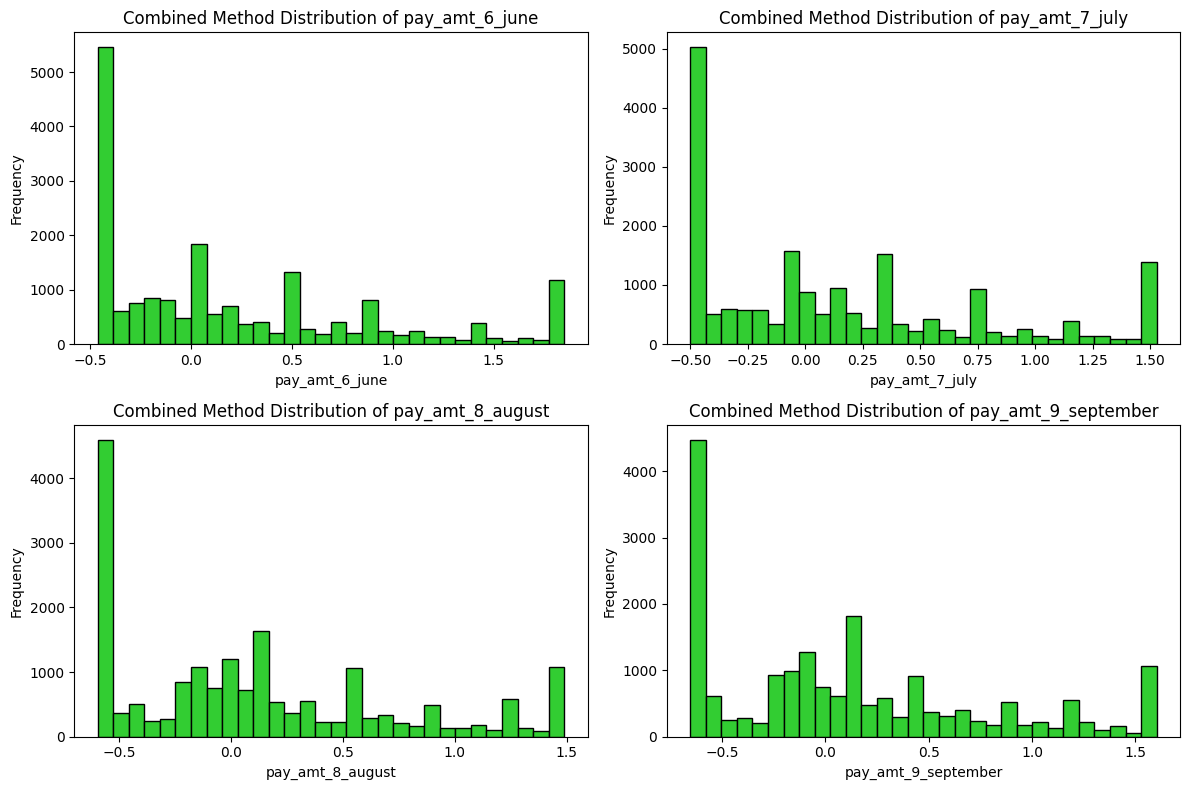


Skewness Dictionary:

Baseline Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Log_transformed Skewness:
pay_amt_6_june: 0.3065
pay_amt_7_july: 0.1395
pay_amt_8_august: -0.1175
pay_amt_9_september: -0.2074

Powertransformer Skewness:
pay_amt_6_june: 0.1845
pay_amt_7_july: 0.1447
pay_amt_8_august: 0.1030
pay_amt_9_september: 0.0985

Quantiletransformer_normal Skewness:
pay_amt_6_june: -0.2763
pay_amt_7_july: -0.2510
pay_amt_8_august: -0.4343
pay_amt_9_september: -0.4440

Quantiletransformer_uniform Skewness:
pay_amt_6_june: -0.1623
pay_amt_7_july: -0.1523
pay_amt_8_august: -0.1562
pay_amt_9_september: -0.1510

Robust_scaler Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Winsorization Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448
pay_amt_8_august: 0.7057
pay_amt_9_september: 0.7136

Combined_method Skewness:
pay_amt_6_june: 1.0053
pay_amt_7_july: 0.8448


In [15]:
from sklearn.preprocessing import RobustScaler

def combined_transformer(df, columns):
    # Copy the dataframe to avoid altering the original data
    df_transformed = df.copy()

    # Step 1: Apply IQR-based outlier removal
    for col in columns:
        Q1 = df_transformed[col].quantile(0.25)
        Q3 = df_transformed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mask outliers
        df_transformed = df_transformed[(df_transformed[col] >= lower_bound) & (df_transformed[col] <= upper_bound)]

    # Step 2: Apply Winsorization (capping)
    for col in columns:
        df_transformed[col] = winsorize(df_transformed[col], limits=[0.05, 0.05])

    # Step 3: Apply Robust Scaling
    scaler = RobustScaler()
    df_transformed[columns] = scaler.fit_transform(df_transformed[columns])

    return df_transformed

# Apply the combined method
df_combined = combined_transformer(df, pc)

# Calculate skewness after applying the combined method
skewness_combined = {col: df_combined[col].skew() for col in pc}

# Add to the skewness dictionary
skewness_dict['combined_method'] = skewness_combined

# Plot the transformed distributions in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(pc):
    axes[i].hist(df_combined[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Combined Method Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Display the skewness values
# print("Combined Method Skewness:")
# for col, skew in skewness_combined.items():
#     print(f"{col}: {skew:.4f}")

print("\nSkewness Dictionary:")
for method, skewness_values in skewness_dict.items():
    print(f"\n{method.capitalize()} Skewness:")
    for col, skew in skewness_values.items():
        print(f"{col}: {skew:.4f}")

## Skewness Data Analysis& Visualizations

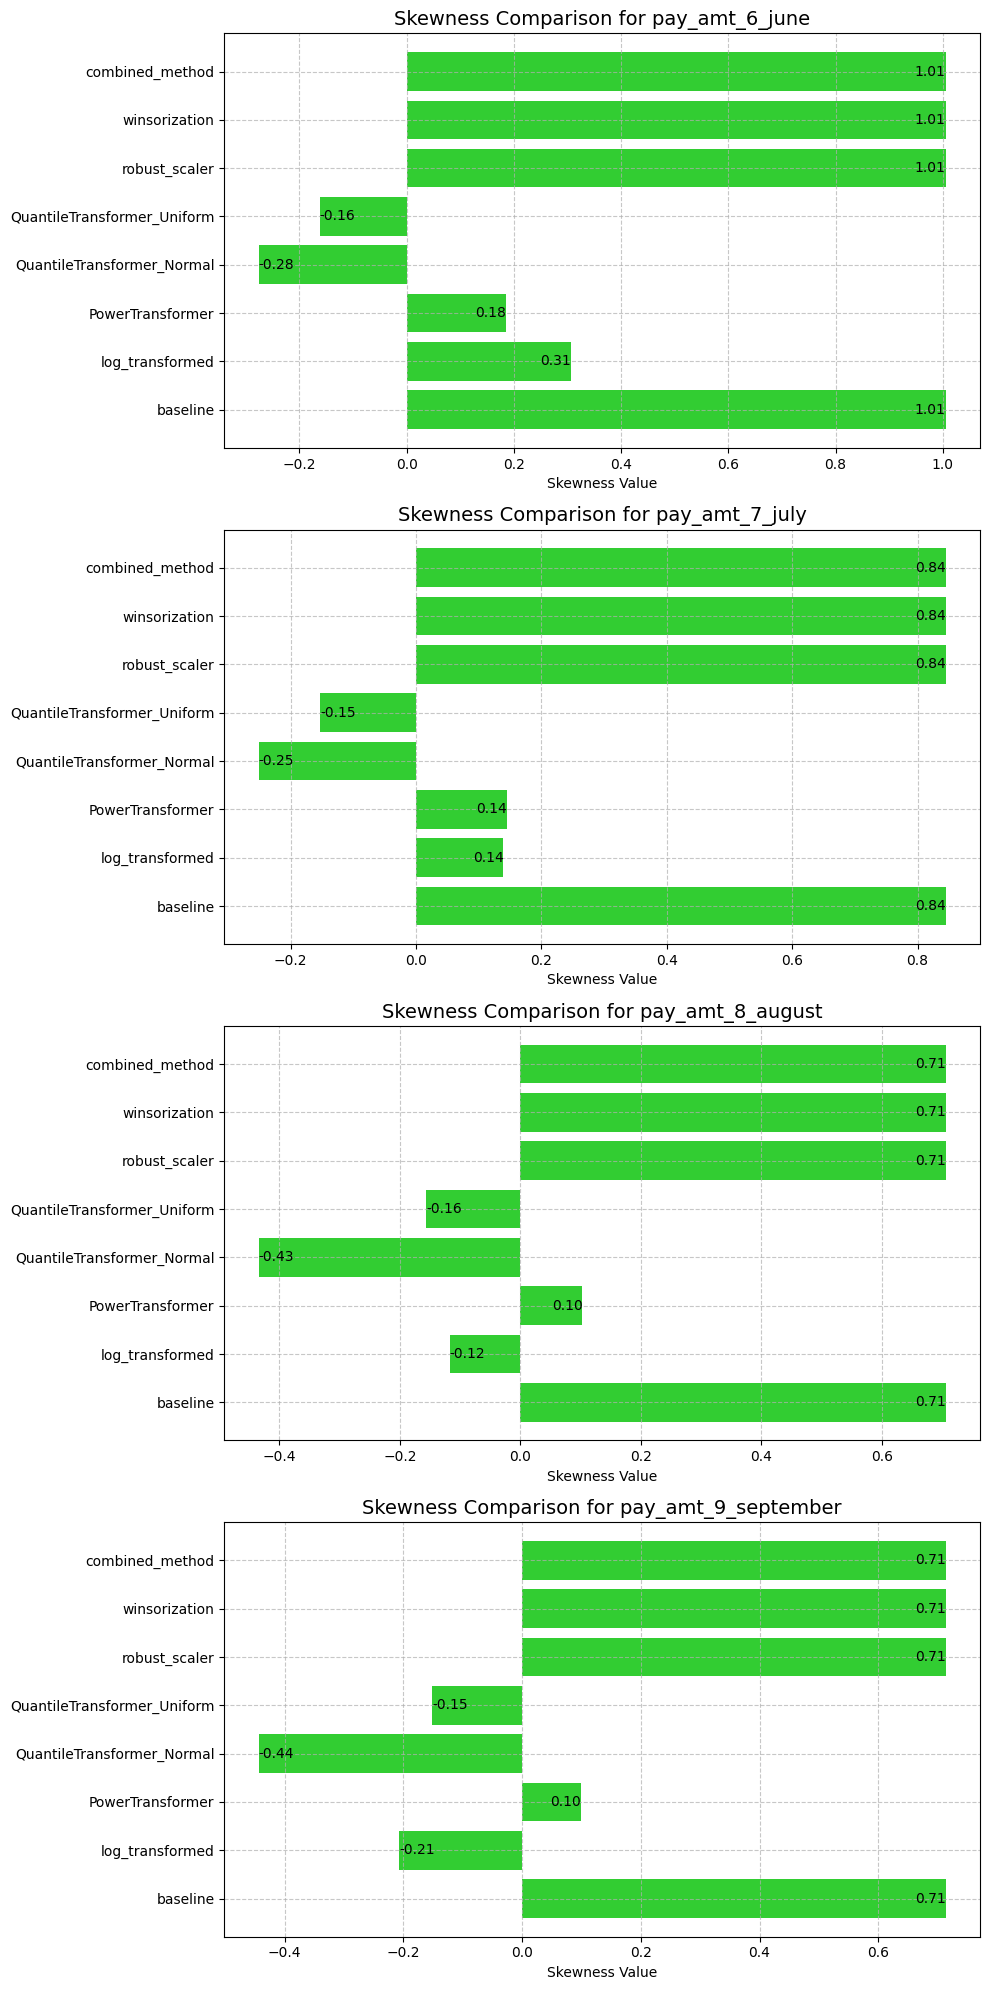

,baseline,log_transformed,PowerTransformer,QuantileTransformer_Normal,QuantileTransformer_Uniform,robust_scaler,winsorization,combined_method
pay_amt_6_june,1.005263,0.306548,0.184467,-0.276291,-0.162263,1.005263,1.005263,1.005263
pay_amt_7_july,0.844826,0.139501,0.144741,-0.251007,-0.152291,0.844826,0.844826,0.844826
pay_amt_8_august,0.705723,-0.117492,0.103008,-0.434322,-0.156248,0.705723,0.705723,0.705723
pay_amt_9_september,0.713611,-0.207437,0.098464,-0.444018,-0.150989,0.713611,0.713611,0.713611


In [16]:
skewness_comparison = pd.DataFrame(skewness_dict)

# Set up the grid (4 rows, 1 column)
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
axes = axes.flatten()

for i, col in enumerate(pc):
    # Extract the skewness values for the current column
    skew_values = skewness_comparison.loc[col]

    # Plot the skewness values using a horizontal bar plot
    axes[i].barh(skew_values.index, skew_values.values, color=color)
    axes[i].set_title(f'Skewness Comparison for {col}', fontsize=14)
    axes[i].set_xlabel('Skewness Value')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    for index, value in enumerate(skew_values.values):
        axes[i].text(value, index, f'{value:.2f}', va='center', ha='left' if value < 0 else 'right', color='black')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Display the table
skewness_comparison

In [26]:
# Specify the path to save the JSON file
json_file_path = '/content/skewness_dictionary_oultiers_removed.json'

# Save the dictionary to a JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(skewness_dict, json_file, indent=4)

print(f"Skewness dictionary saved to {json_file_path}")

Skewness dictionary saved to /content/skewness_dictionary_oultiers_removed.json




### Skewness Data Summary

- **Baseline Skewness**: All columns have extremely high positive skewness values, indicating that the data is highly right-skewed. For example, the skewness for `pay_amt_8_august` is 30.44, which is very extreme.

- **Log Transformation**: The log transformation significantly reduces the skewness, making it negative (left-skewed). The skewness values range from -0.97 to -1.30. This suggests that the log transformation made the data much more symmetric but may have introduced left-skewness.

- **PowerTransformer**: This method also reduces skewness but not as effectively as the log transformation. Skewness values are closer to 0, ranging from -0.11 to -0.16. The data is slightly left-skewed but less so than with the log transformation.

- **QuantileTransformer (Normal Distribution)**: This method produces results similar to the log transformation, reducing the skewness to around -1.1 to -1.3. The distribution becomes more symmetric with some left-skewness.

- **QuantileTransformer (Uniform Distribution)**: The results are similar to the normal distribution variant but with slightly less left-skewness. Skewness values are closer to 0, which suggests this method could be good for normalizing highly skewed data.

- **RobustScaler**: This method does not change the skewness at all. The skewness remains exactly as it was in the baseline. This confirms that RobustScaler is more focused on scaling than on reducing skewness.

- **Winsorization**: This method reduces skewness significantly but not as much as the log or quantile transformations. Skewness values remain slightly positive (1.77 to 1.89).

- **Combined Method (IQR + Winsorization + Robust Scaling)**: The combined approach effectively reduces skewness, bringing it close to 0. The values range from 0.74 to 0.99, which suggests that this method balances between reducing skewness and retaining the distribution’s original structure.

### Skewness Ratios Compared to Baseline

- **Log Transformation**: The log transformation consistently reduces the skewness to around 7.5% to 8.8% of the baseline value, meaning it is highly effective in reducing skewness.

- **PowerTransformer**: The PowerTransformer reduces skewness to around 1.3% to 1.5% of the baseline, which is a strong performance but slightly less effective than the log transformation.

- **QuantileTransformer (Normal Distribution)**: This method reduces skewness to around 8% to 8.9% of the baseline, similar to the log transformation.

- **QuantileTransformer (Uniform Distribution)**: It performs similarly to the normal variant, reducing skewness to around 1.4% to 1.7% of the baseline.

- **RobustScaler**: As expected, the ratio remains 1.0 across all columns, indicating no reduction in skewness.

- **Winsorization**: The Winsorization method reduces skewness to around 6% to 12% of the baseline value, performing moderately well.

- **Combined Method (IQR + Winsorization + Robust Scaling)**: The combined method reduces skewness to around 2.5% to 7.6% of the baseline, indicating a good balance between reducing skewness and retaining distribution structure.

### Recommendations and Conclusion

- **Log Transformation** and **QuantileTransformer (Normal Distribution)** are highly effective at reducing skewness but introduce left-skewness. These methods are useful when a more symmetric distribution is desired.

- **PowerTransformer** provides a more balanced reduction in skewness without introducing significant left-skewness, making it suitable for normalizing data with varying degrees of skewness.

- **Combined Method (IQR + Winsorization + Robust Scaling)** shows the best overall performance by reducing skewness while preserving the general distribution structure, which could be beneficial if you want to avoid over-transforming your data.

- **RobustScaler** does not address skewness, making it better suited for situations where scaling is needed but the original distribution should be preserved.

Overall, the choice of method depends on the specific needs of your analysis. If reducing skewness is critical, the log transformation or quantile transformers are strong options. However, if you want to balance skewness reduction with preserving data structure, the combined method could be the best choice.


### Suggested Next Steps:
1. **Copy the Notebook**: Make a copy of the notebook so that you can keep your original results intact for comparison.
2. **Apply Combined Outlier Removal**: In the copied notebook, apply the combined method for outlier removal to the relevant columns.
3. **Re-run Skewness Transformations**: Run the same skewness transformations (log, PowerTransformer, quantile, etc.) on the cleaned data.
4. **Compare Results**: Compare the skewness values and distribution plots before and after outlier removal to evaluate if there is a noticeable improvement.

1. **Improved Data Quality**: The combined outlier removal method has proven effective at reducing extreme values while retaining a significant portion of the data. By applying this method first, you can create a cleaner dataset with fewer distortions caused by outliers. This could lead to better, more reliable skewness transformations.

2. **More Accurate Transformations**: Transformations like log, power, and quantile methods are sensitive to extreme values. If those outliers remain in the dataset, they can skew the transformations themselves, resulting in suboptimal results. Removing the outliers first allows these methods to work more effectively.

3. **Comparison and Validation**: By running the skewness analysis again after outlier removal, you can directly compare the results with the original analysis. This comparison will help you understand how much of the skewness was due to outliers versus inherent data structure. You’ll be able to see if outlier removal allows transformations like log or quantile scaling to perform better.

4. **Informed Decision-Making**: If you find that applying outlier removal leads to significantly better skewness reductions and distribution shapes, you’ll have stronger evidence that this preprocessing step should be part of your final pipeline. This can lead to better model performance when you move to training and testing.


## Model the Methods

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import logging

from data_transformations_utils import *
from loan_data_utils import ordinal_columns

# Define categorical and numeric columns
categorical_columns = ['sex', 'marriage']
numeric_columns = df.select_dtypes(include=['number']).columns

# Extract the categories for education and pay_delay columns
education_categories = list(df['education'].cat.categories)
pay_delay_categories = list(df['pay_delay_9_september'].cat.categories)

# Ensure the categories are in the correct order for OrdinalEncoder
categories_for_encoder = [education_categories] + [pay_delay_categories] * (len(ordinal_columns) - 1)

# Create the preprocessing pipeline
preprocessor = create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder)

# Define your target and features
target = 'default_payment_next_month'
X = df.drop(columns=[target])
y = df[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluate the baseline model separately
baseline_report = evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test)
classification_reports = {'baseline': baseline_report}

# Transformation methods for pay columns
transformations = {
    'log_transformed': lambda X: log_transform(X, pay_columns),
    'PowerTransformer': lambda X: pd.DataFrame(PowerTransformer().fit_transform(X[pay_columns]), columns=pay_columns, index=X.index),
    'QuantileTransformer_Normal': lambda X: pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X[pay_columns]), columns=pay_columns, index=X.index),
    'QuantileTransformer_Uniform': lambda X: pd.DataFrame(QuantileTransformer(output_distribution='uniform').fit_transform(X[pay_columns]), columns=pay_columns, index=X.index),
    'robust_scaler': lambda X: pd.DataFrame(RobustScaler().fit_transform(X[pay_columns]), columns=pay_columns, index=X.index),
    'winsorization': lambda X: pd.DataFrame(winsorize_transform(X[pay_columns]), columns=pay_columns, index=X.index),
    'combined_method': lambda X: pd.DataFrame(combined_outlier_removal(X[pay_columns]), columns=pay_columns, index=X.index)
}

# Loop through each method, evaluate the model, and store the results in the dictionary
for method_name, transformation in transformations.items():
    evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation)

# Save the classification reports to a JSON file
save_classification_reports(classification_reports)


Classification reports saved as classification_reports.json


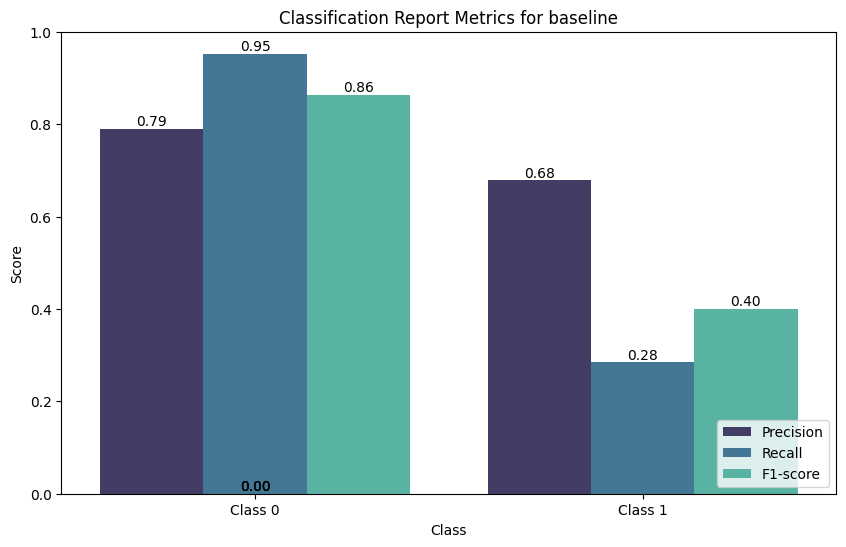

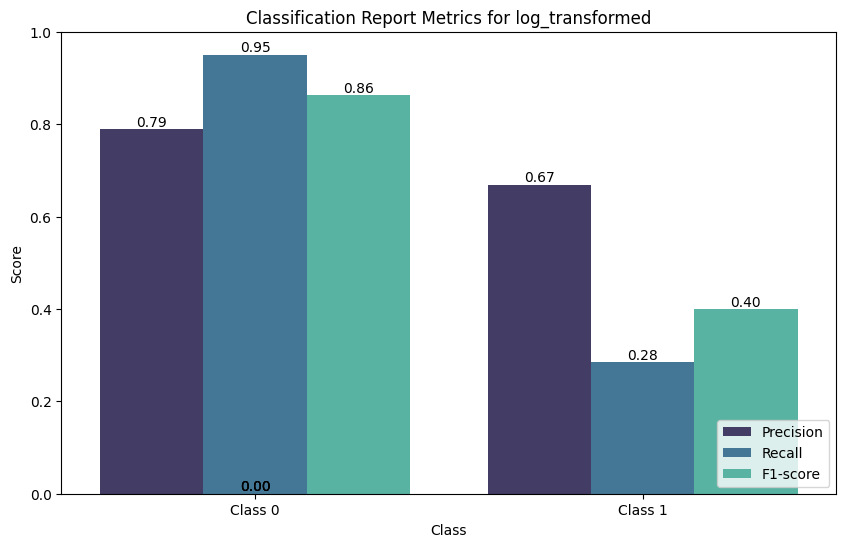

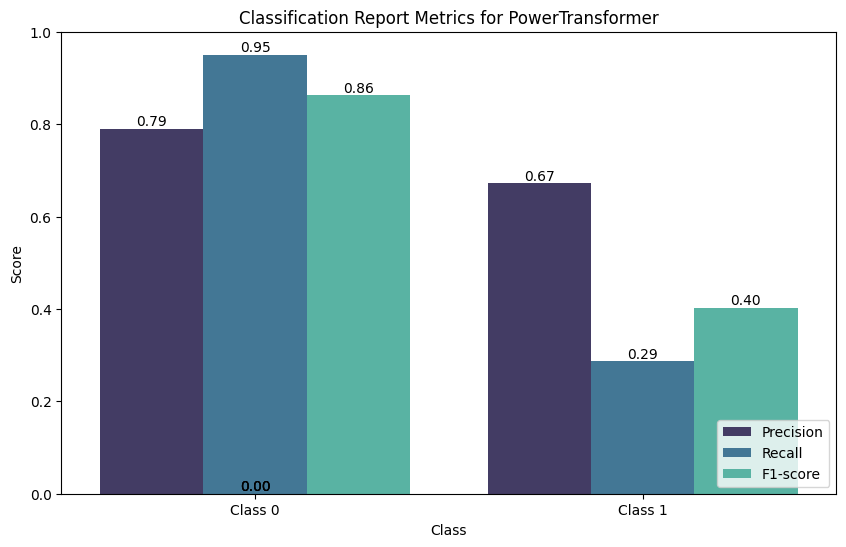

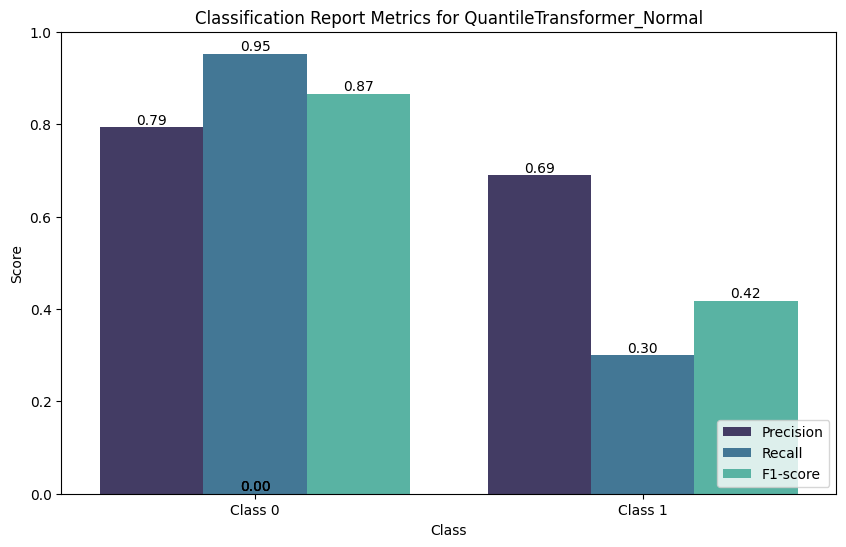

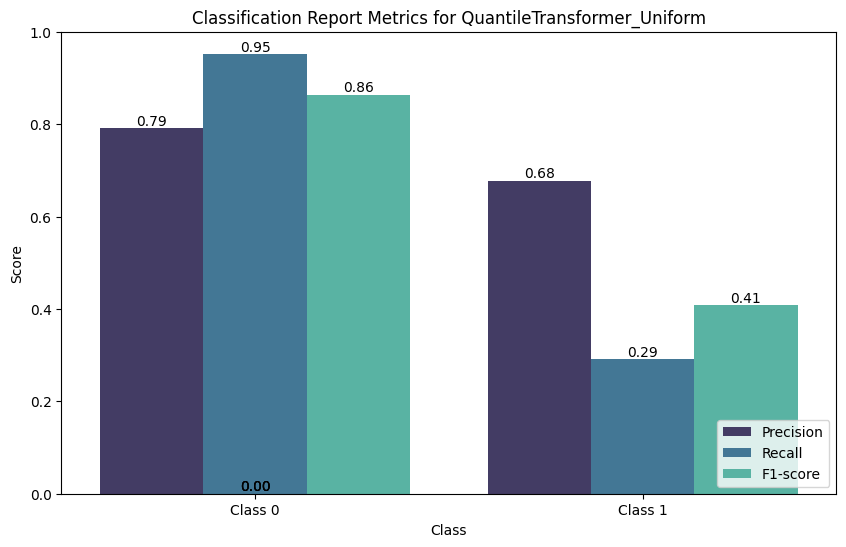

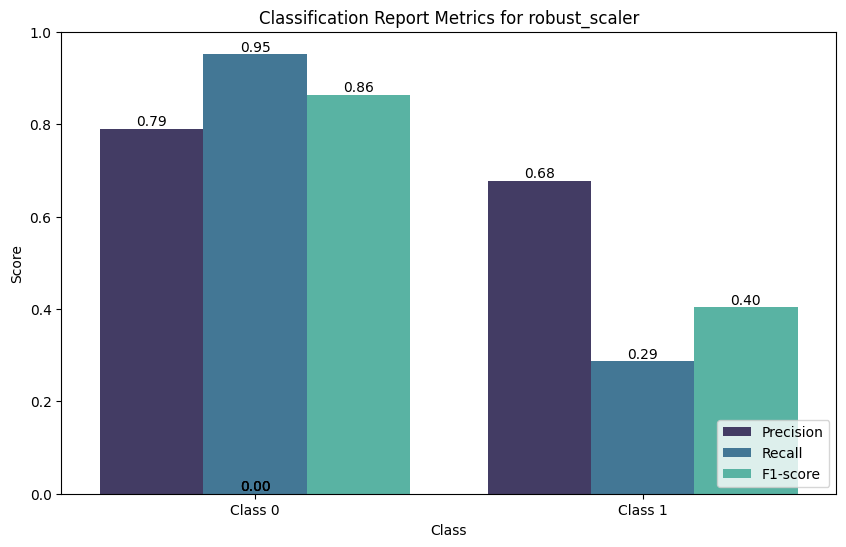

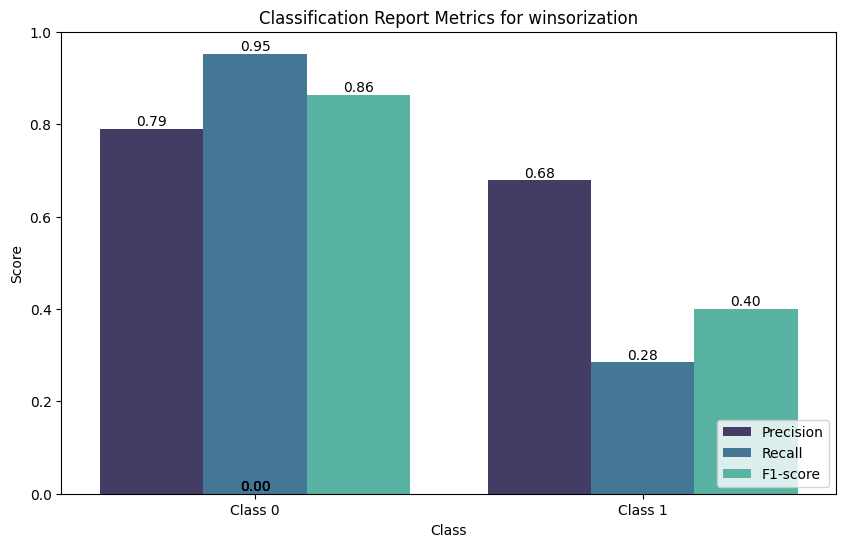

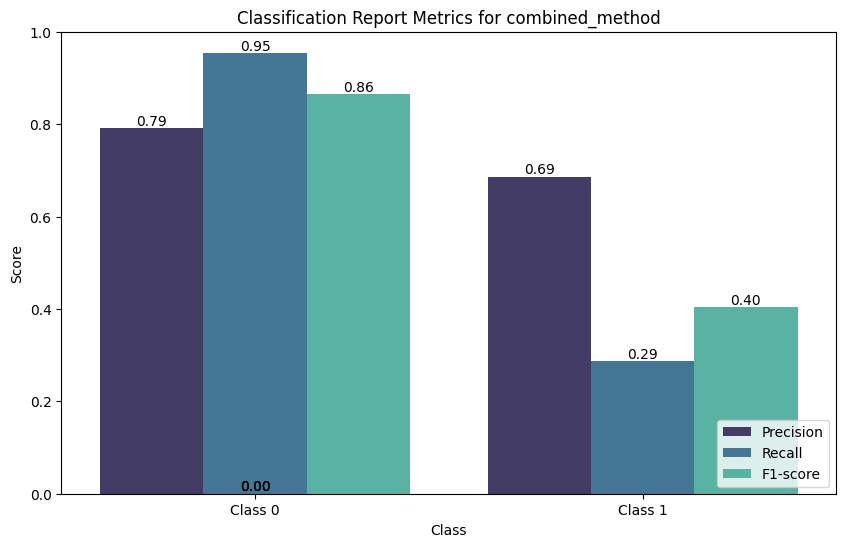

In [18]:
from data_transformations_utils import plot_classification_report_metrics

# Loop through the classification reports and plot the metrics
for model_name, report in classification_reports.items():
    plot_classification_report_metrics(report, model_name)


In [19]:

# Convert the skewness dictionary to a DataFrame
skewness_df = pd.DataFrame(skewness_dict).transpose().reset_index().rename(columns={'index': 'model'})

# Function to convert classification report to DataFrame
def classification_report_to_df(report, model_name):
    report_df = pd.DataFrame(report).transpose()
    report_df['model'] = model_name
    return report_df[['model'] + [col for col in report_df.columns if col != 'model']]

# Convert classification reports to DataFrames and combine them
classification_reports_df = pd.concat(
    [classification_report_to_df(report, model_name) for model_name, report in classification_reports.items()],
    axis=0
).reset_index(drop=True)

# Merge the classification reports DataFrame with the skewness DataFrame
combined_df = pd.merge(classification_reports_df, skewness_df, on='model', how='left')

# Display the combined DataFrame
combined_df


,model,precision,recall,f1-score,support,pay_amt_6_june,pay_amt_7_july,pay_amt_8_august,pay_amt_9_september
0,baseline,0.789921,0.952314,0.863549,2831.000000,1.005263,0.844826,0.705723,0.713611
1,baseline,0.678571,0.284431,0.400844,1002.000000,1.005263,0.844826,0.705723,0.713611
2,baseline,0.777720,0.777720,0.777720,0.777720,1.005263,0.844826,0.705723,0.713611
3,baseline,0.734246,0.618372,0.632196,3833.000000,1.005263,0.844826,0.705723,0.713611
4,baseline,0.760813,0.777720,0.742591,3833.000000,1.005263,0.844826,0.705723,0.713611
5,log_transformed,0.789551,0.950194,0.862456,2831.000000,0.306548,0.139501,-0.117492,-0.207437
6,log_transformed,0.669014,0.284431,0.399160,1002.000000,0.306548,0.139501,-0.117492,-0.207437
7,log_transformed,0.776154,0.776154,0.776154,0.776154,0.306548,0.139501,-0.117492,-0.207437
8,log_transformed,0.729283,0.617313,0.630808,3833.000000,0.306548,0.139501,-0.117492,-0.207437
9,log_transformed,0.758041,0.776154,0.741344,3833.000000,0.306548,0.139501,-0.117492,-0.207437


In [20]:
# Convert the skewness dictionary to a DataFrame
skewness_df = pd.DataFrame(skewness_dict).transpose().reset_index().rename(columns={'index': 'model'})

# Function to convert classification report to DataFrame and include class labels
def classification_report_to_df(report, model_name):
    # Convert report to DataFrame and transpose
    report_df = pd.DataFrame(report).transpose().reset_index().rename(columns={'index': 'class'})

    # Add the model name
    report_df['model'] = model_name

    # Reorder columns so 'model' and 'class' are first
    return report_df[['model', 'class'] + [col for col in report_df.columns if col not in ['model', 'class']]]

# Convert classification reports to DataFrames and combine them
classification_reports_df = pd.concat(
    [classification_report_to_df(report, model_name) for model_name, report in classification_reports.items()],
    axis=0
).reset_index(drop=True)

# Merge the classification reports DataFrame with the skewness DataFrame
combined_df = pd.merge(classification_reports_df, skewness_df, on='model', how='left')

# Display the combined DataFrame
combined_df


,model,class,precision,recall,f1-score,support,pay_amt_6_june,pay_amt_7_july,pay_amt_8_august,pay_amt_9_september
0,baseline,0,0.789921,0.952314,0.863549,2831.000000,1.005263,0.844826,0.705723,0.713611
1,baseline,1,0.678571,0.284431,0.400844,1002.000000,1.005263,0.844826,0.705723,0.713611
2,baseline,accuracy,0.777720,0.777720,0.777720,0.777720,1.005263,0.844826,0.705723,0.713611
3,baseline,macro avg,0.734246,0.618372,0.632196,3833.000000,1.005263,0.844826,0.705723,0.713611
4,baseline,weighted avg,0.760813,0.777720,0.742591,3833.000000,1.005263,0.844826,0.705723,0.713611
5,log_transformed,0,0.789551,0.950194,0.862456,2831.000000,0.306548,0.139501,-0.117492,-0.207437
6,log_transformed,1,0.669014,0.284431,0.399160,1002.000000,0.306548,0.139501,-0.117492,-0.207437
7,log_transformed,accuracy,0.776154,0.776154,0.776154,0.776154,0.306548,0.139501,-0.117492,-0.207437
8,log_transformed,macro avg,0.729283,0.617313,0.630808,3833.000000,0.306548,0.139501,-0.117492,-0.207437
9,log_transformed,weighted avg,0.758041,0.776154,0.741344,3833.000000,0.306548,0.139501,-0.117492,-0.207437


#### Loan Data Utils

In [21]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df


def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


# Utility and validation functions first
def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df



def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [22]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [23]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully


In [24]:
# script_content=r'''

# # data_transformations_utils.py

# import pandas as pd
# import numpy as np
# from scipy.stats import mstats
# from sklearn.preprocessing import RobustScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer, PowerTransformer, QuantileTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# import json
# import logging

# # Function to evaluate the baseline model
# def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', LogisticRegression(max_iter=1000, random_state=42))
#     ])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     return report

# # Define the columns to transform (these should be passed as arguments in a real setup)
# pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']

# # Function to apply Winsorization (Capping)
# def winsorize_transform(X):
#     X_transformed = X.copy()
#     for col in pay_columns:
#         X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
#     return X_transformed

# # Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
# def combined_outlier_removal(X):
#     def apply_iqr_outlier_removal(df):
#         df_cleaned = df.copy()
#         for col in df_cleaned.columns:
#             Q1 = df_cleaned[col].quantile(0.25)
#             Q3 = df_cleaned[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
#         return df_cleaned

#     def apply_winsorization(df):
#         df_winsorized = df.copy()
#         for col in df_winsorized.columns:
#             df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
#         return df_winsorized

#     def apply_robust_scaler(df):
#         scaler = RobustScaler()
#         return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#     X_cleaned = apply_iqr_outlier_removal(X)
#     X_winsorized = apply_winsorization(X_cleaned)
#     X_scaled = apply_robust_scaler(X_winsorized)

#     return X_scaled

# # Transformation methods
# def log_transform(X):
#     X_transformed = X.copy()
#     for col in pay_columns:
#         X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
#     return X_transformed

# # Function to evaluate models with different transformations
# def evaluate_method(preprocessor, X_train_transformed, X_test_transformed, y_train, y_test, method_name, classification_reports):
#     logging.info(f"Evaluating method: {method_name}")

#     # Build the pipeline
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', LogisticRegression(max_iter=1000, random_state=42))
#     ])

#     # Train and evaluate the model
#     pipeline.fit(X_train_transformed, y_train)
#     y_pred = pipeline.predict(X_test_transformed)
#     report = classification_report(y_test, y_pred, output_dict=True)

#     # Save the report in the dictionary under the method name
#     classification_reports[method_name] = report


# # Function to save the classification reports to JSON
# def save_classification_reports(reports, filename='classification_reports.json'):
#     with open(filename, 'w') as json_file:
#         json.dump(reports, json_file)
#     logging.info(f"Classification reports saved as {filename}")

# # '''

# with open('data_transformations_utils.py', 'w') as file:
#     file.write(script_content)

# print("data_transformations_utils.py created successfully")
# # Reload script to make functions available for use
# import importlib
# import data_transformations_utils
# importlib.reload(data_transformations_utils)

# from data_transformations_utils import *
